# Import Liberaries

In [12]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Uplaod Data

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# Preprocessing

In [3]:
print(digits.target.shape)
print(digits.data.shape)
print(digits.images.shape)

(1797,)
(1797, 64)
(1797, 8, 8)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=32)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
def calculate_metrics(y_train, y_test, y_train_pred, y_test_pred):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

    p = precision_score(y_true=y_test, y_pred=y_test_pred, average='weighted')

    r = recall_score(y_true=y_test, y_pred=y_test_pred, average='weighted')

    print('Accuracy of train:', acc_train)
    print('Accuracy of test:', acc_test)
    print('Precision:',p)
    print('Recall:', r)

    return acc_train, acc_test, p, r
    

# Model Defintion

### 1.Random Forest

In [6]:
rf = RandomForestClassifier(max_depth=128, n_estimators=512)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_train_pred, y_test_pred)

Accuracy of train: 1.0
Accuracy of test: 0.9814814814814815
Precision: 0.9816417762636246
Recall: 0.9814814814814815


### 2.SVC

In [14]:
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_train_pred, y_test_pred)

Accuracy of train: 0.9984089101034208
Accuracy of test: 0.987037037037037
Precision: 0.9875899238837835
Recall: 0.987037037037037


### 3.ANN

In [15]:
ann = MLPClassifier()
ann.fit(X_train, y_train)

y_train_pred = ann.predict(X_train)
y_test_pred = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_train_pred, y_test_pred)

Accuracy of train: 1.0
Accuracy of test: 0.9907407407407407
Precision: 0.9909393538560205
Recall: 0.9907407407407407


C:\Users\lenovo\miniconda3\envs\numpy_course\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusion

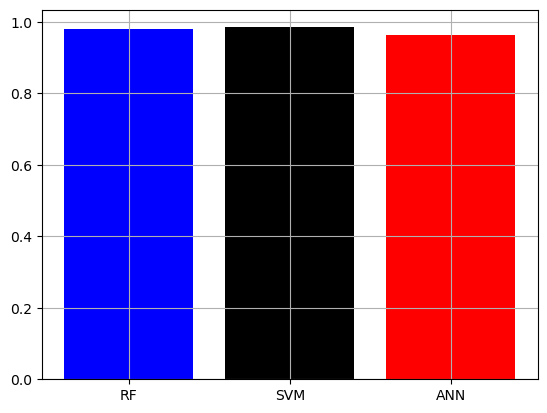

In [9]:
acc_test = [acc_test_rf, acc_test_svm, acc_test_ann]
title = ['RF', 'SVM', 'ANN']
colors = ['blue', 'black', 'red']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()
